### End 2 End NLP Project
+ Emotion Detection In Text
+ Text Classifier

In [ ]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [ ]:
# Load Data Viz Pkgs
import seaborn as sns

In [ ]:
!pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 5.6 MB/s eta 0:00:00


In [ ]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [ ]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [24]:
df = pd.read_csv("/content/dasetEmotion.csv", error_bad_lines=False)

<ipython-input-24-7a4a63ee5a5b>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/content/dasetEmotion.csv", error_bad_lines=False)


In [25]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_text
0,1,senang,Pelayanannya sangat memuaskan.,pelayanannya sangat memuaskan
1,2,puas,Proses administrasinya cepat dan mudah.,proses administrasi cepat mudah
2,3,biasa saja,Tidak ada yang istimewa dari pelayanannya.,tidak ada yang istimewa pelayanannya
3,4,kesal,Pelayanannya sangat lambat dan tidak responsif.,pelayanannya sangat lambat tidak responsif
4,5,kecewa,Kualitas layanan menurun drastis.,kualitas layanan menurun drastis


In [30]:
df = pd.read_csv("/content/dasetEmotion.csv")
df.columns = df.columns.str.strip()

In [31]:
# Value Counts
df['Emotion'].value_counts()

 senang        26
 biasa saja    18
 kesal         18
 kecewa        15
 puas          14
 sedih          9
Name: Emotion, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

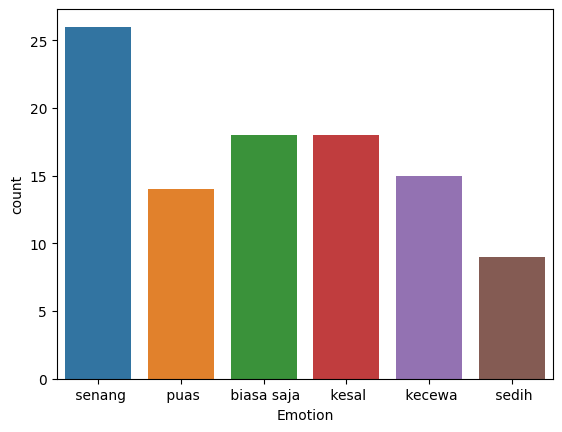

In [32]:
# Plot
sns.countplot(x='Emotion',data=df)

In [33]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [34]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [35]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [36]:
df

,Unnamed: 0,Emotion,Text,Clean_text,Clean_Text
0,1,senang,Pelayanannya sangat memuaskan.,pelayanannya sangat memuaskan,Pelayanannya sangat memuaskan.
1,2,puas,Proses administrasinya cepat dan mudah.,proses administrasi cepat mudah,Proses administrasinya cepat dan mudah.
2,3,biasa saja,Tidak ada yang istimewa dari pelayanannya.,tidak ada yang istimewa pelayanannya,Tidak ada yang istimewa dari pelayanannya.
3,4,kesal,Pelayanannya sangat lambat dan tidak responsif.,pelayanannya sangat lambat tidak responsif,Pelayanannya sangat lambat dan tidak responsif.
4,5,kecewa,Kualitas layanan menurun drastis.,kualitas layanan menurun drastis,Kualitas layanan menurun drastis.
...,...,...,...,...,...
95,96,kecewa,Kualitas layanan menurun drastis.,kualitas layanan menurun drastis,Kualitas layanan menurun drastis.
96,97,senang,Pelayanan ramah dan membantu.,pelayanan ramah membantu,Pelayanan ramah dan membantu.
97,98,senang,Saya merasa senang dengan pelayanan yang dibe...,saya merasa senang dengan pelayanan diberikan,Saya merasa senang dengan pelayanan yang diber...
98,99,biasa saja,Pelayanannya biasa saja tidak ada yang istimewa.,pelayanannya biasa saja tidak ada yang istimewa,Pelayanannya biasa saja tidak ada yang istimewa.


In [37]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [38]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [39]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [40]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [41]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [42]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [43]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

1.0

In [44]:
# Make A Prediction
ex1 = "This book was so interesting it made me happy"

In [45]:
pipe_lr.predict([ex1])

array([' senang'], dtype=object)

In [46]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.0770785 , 0.17786946, 0.09240378, 0.09589932, 0.05450859,
        0.50224035]])

In [47]:
# To Know the classes
pipe_lr.classes_

array([' biasa saja', ' kecewa', ' kesal', ' puas', ' sedih', ' senang'],
      dtype=object)

In [48]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_03_june_2021.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()